In [1]:
# define relevants paths and load functions and libraries

%run Z:\\home\\shared\\Gaia\\Coliseum\\Delays\\paper_code\\Analysis\\helper_functions\\functions_analysis.py

data_path = 'paper_code\\Datasets\\' # your data path
saving_path = 'paper_code\\Figures_output\\' # your saving figures path


In [2]:
data_path = 'Z:\\home\\shared\\Gaia\\Coliseum\\Delays\\paper_code\\Datasets\\'

In [10]:
# extract data for confusion matrix figure 4B and 4C
# load the outputs from this code run_classifier_increasing_N.py

# compare it to randomised labels
this_path = ''.join([data_path,'decoder_datasets\\clf_increasing_N_SVM\\'])
n_neurons = 5360
n_iter = 20
max_n = n_neurons
this_n = np.arange(0, max_n, 25)

# Ensure max_n is included
if this_n[-1] != max_n:
    this_n = np.append(this_n, max_n-1)
    
all_scores_random = np.full((n_iter, n_neurons), np.nan)

# load each repetition infividually and store the mean accuracy 
for i in tqdm(range(n_iter)):
    file =''.join([this_path,f'PRED_rep{i}_random_SVM.npy'])     
    all_predicted=np.load(file)
    file =''.join([this_path,f'TEST_rep{i}_random_SVM.npy'])
    Y_test=np.load(file)

    pred = all_predicted[i,:,:,:]
    test = Y_test[i,:,:,:]


    for n in this_n: # for each neuron
        delay_score = np.zeros((pred.shape[1],1))
        for k in range(pred.shape[1]): # for each kfold
            cm = confusion_matrix(test[n,k,:],pred[n,k,:], normalize='true')
            # extract the score for delays
            score = np.diag(cm)
            delay_score[k] = np.mean(score[:11])    
        # save the scores for the main figure
        all_scores_random[i,n] = np.mean(delay_score)*100
        
# and it get saved so it is easier for th eplotting ot just load it
save_dir = ''.join([data_path,'decoder_datasets\\decoder_accuracy_all_neurons_SVM_random.npy'])
np.save(save_dir,all_scores_random)        


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:34<00:00,  4.72s/it]


In [15]:
# extract data for confusion matrix figure 4B and 4C
# load the outputs from this code run_classifier_increasing_N.py

n_iter = 20
n_neurons = 5360

# initiate empty lists to append 
pred_all =[]
test_all =[]
all_scores = np.full((n_iter, n_neurons), np.nan)

# Create an array from 0 to max_n with a step of 50
max_n = n_neurons
this_n = np.arange(0, max_n, 25)

# Ensure max_n is included
if this_n[-1] != max_n:
    this_n = np.append(this_n, max_n-1)
    
# load each repetition infividually and store the mean accuracy 
for i in tqdm(range(all_scores.shape[0])):
    file =''.join([this_path,f'PRED_rep{i}_SVM.npy'])     
    all_predicted=np.load(file)
    file =''.join([this_path,f'TEST_rep{i}_SVM.npy'])
    Y_test=np.load(file)

    pred = all_predicted[i,:,:,:]
    test = Y_test[i,:,:,:]
    
    for n in this_n: # for each neuron
        delay_score = np.zeros((pred.shape[1],1))
        for k in range(pred.shape[1]): # for each kfold
            cm = confusion_matrix(test[n,k,:],pred[n,k,:], normalize='true')            
            # extract the score for delays
            score = np.diag(cm)
            delay_score[k] = np.mean(score[:11])    
       
        if n == pred.shape[0]-1: # to plot the confusion matrix for all neurons
            pred_all.append(pred[n,:,:].reshape(-1))
            test_all.append(test[n,:,:].reshape(-1))             

        # save the scores for the main figure
        all_scores[i,n] = np.mean(delay_score)*100

pred_all = np.array(pred_all)
test_all = np.array(test_all)

# and it get saved so it is easier for the plotting ot just load it
save_dir = ''.join([data_path,'decoder_datasets\\decoder_accuracy_all_neurons_SVM.npy'])
np.save(save_dir,all_scores)       

save_dir = ''.join([data_path,'decoder_datasets\\predicted_accuracy_all_neurons_SVM_CM.npy'])
np.save(save_dir,pred_all) 
save_dir = ''.join([data_path,'decoder_datasets\\observed_accuracy_all_neurons_SVM_CM.npy'])
np.save(save_dir,test_all) 


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [03:41<00:00, 11.07s/it]


In [17]:
# increased number of repetitions and do it for the first 200 neurons
# load the outputs from this code run_classifier_200_N.py

file =''.join([data_path,'decoder_datasets\\clf_increasing_N_SVM\\PRED_first200neurons_SVM.npy'])     
all_predicted=np.load(file)
file =''.join([data_path,'decoder_datasets\\clf_increasing_N_SVM\\TEST_first200neurons_SVM.npy'])
Y_test=np.load(file)

# initiate empty lists to append 
n_iter = all_predicted.shape[0]
n_neurons = all_predicted.shape[1]
all_scores_200 = np.zeros((n_iter,n_neurons))   


for i in tqdm(range(all_scores_200.shape[0])):
    pred = all_predicted[i,:,:,:]
    test = Y_test[i,:,:,:]

    for n in range(n_neurons): # for each neuron
        delay_score = np.zeros((pred.shape[1],1))
        for k in range(pred.shape[1]): # for each kfold
            cm = confusion_matrix(test[n,k,:],pred[n,k,:],normalize='true')
            # extract the score for delays
            score = np.diag(cm)
            delay_score[k] = np.mean(score[:11])    

        # save the scores for the main figure
        all_scores_200[i,n] = np.mean(delay_score)*100
        
# and it get saved so it is easier for the plotting ot just load it
save_dir = ''.join([data_path,'decoder_datasets\\decoder_accuracy_all_neurons_SVM_200neurons.npy'])
np.save(save_dir,all_scores_200) 


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [01:27<00:00,  2.28it/s]


In [21]:
# calculate decoding accuracy for different subpopulations of neurons and the decoding error
# load the outputs from this code run_classifier_subpopulations.py

n_reps = 20
type_neurons = ['1','2','delay','3NOdelay']
all_scores = np.full((len(type_neurons), n_reps), np.nan)
all_errors = np.full((len(type_neurons), n_reps), np.nan)

n = 200 # select how many neurons
count = 1

# put a blue colormap
val_max = 100
val_min = 0
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('mycmap', [(1, 1, 1), '#000099'])
    
for mod in tqdm(type_neurons):
    pred_50 =[]
    test_50 = []
    
    file =''.join([data_path,f'decoder_datasets\\clf_types_neurons_SVM\\PRED_mod_{mod}_SVM.npy'])
    all_predicted=np.load(file)
    file =''.join([data_path,f'decoder_datasets\\clf_types_neurons_SVM\\TEST_mod_{mod}_SVM.npy'])
    Y_test=np.load(file)

    # extract values for a specific number of neurons    
    if mod == 'delay':
        pred = all_predicted[:,n,:,:]
        test = Y_test[:,n,:,:]
    elif mod == '3NOdelay':
        pred = all_predicted[:,n,:,:]
        test = Y_test[:,n,:,:]
    else:
        pred = all_predicted[count,:,n,:,:]
        test = Y_test[count,:,n,:,:]    

    for rep in range(pred.shape[0]): # for each repetition
        delay_score = np.full((pred.shape[1],1), np.nan)
        error_score = np.full((pred.shape[1],1), np.nan)
        
        for k in range(pred.shape[1]): # for each k fold
            
            # compute the confusion matrix
            cm = confusion_matrix(test[rep,k,:], pred[rep,k,:],normalize='true')
            
            # extract the score for delays
            score = np.diag(cm)
            E_score = np.diag(cm[12:,:12])
            if score.size > 1:
                delay_score[k] = np.nanmean(score[:11]) 
                error_score[k] = np.nanmean(E_score) 
                    
            
        all_scores[count-1,rep] = np.nanmean(delay_score)*100
        all_errors[count-1,rep] = np.nanmean(error_score)*100

    count += 1
    
# and it get saved so it is easier for the plotting ot just load it
save_dir = ''.join([data_path,'decoder_datasets\\decoder_accuracy_subpopulations_neurons_SVM.npy'])
np.save(save_dir,all_scores)    

save_dir = ''.join([data_path,'decoder_datasets\\decoder_error_subpopulations_neurons_SVM.npy'])
np.save(save_dir,all_errors)    

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:29<00:00,  7.26s/it]


In [24]:
#  calculate decoding accuracy for decoder trained without Ashifted trials
# load the outputs from this code run_classifier_subpopulations_submatrix.py

n_reps = 20
type_neurons = ['delay','3NOdelay']
n = 200
mean_error = np.zeros((n_reps,len(type_neurons)))

for count,mod in enumerate(tqdm(type_neurons)):
    
    file =''.join([data_path,f'decoder_datasets\\clf_types_neurons_SVM\\PRED_mod_{mod}_SVM_small.npy'])
    all_predicted=np.load(file)
    file =''.join([data_path,f'decoder_datasets\\clf_types_neurons_SVM\\TEST_mod_{mod}_SVM_small.npy'])
    Y_test=np.load(file)

    # extract values for a specific number of neurons    
    pred = all_predicted[:,n,:,:]
    test = Y_test[:,n,:,:]
    
    for rep in range(pred.shape[0]):
        
        this_pred = pred[rep,:,:].reshape(-1)
        this_test = test[rep,:,:].reshape(-1)
        non_zero_error = ((this_test-this_pred).T)*10
        # any error
        mean_error[rep,count] = np.mean(abs(non_zero_error))
        
    count += 1
    
save_dir = ''.join([data_path,'decoder_datasets\\decoder_decoding_error_subpopulations_neurons_SVM_small.npy'])
np.save(save_dir,mean_error) 


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.71it/s]


In [3]:
# import relevant datasets

# load the main dataset
file= ''.join([data_path,'neurons_datasets\\delay_tuning_dataset.mat'])
data_dict = mat73.loadmat(file)
DAT=data_dict['delay_tuning_dataset']

# check keys available
print(DAT.keys())

# extract all keys
for k in DAT.keys():
    globals()[k] = DAT[k]

dict_keys(['AP_lim', 'ML_lim', 'all_boot_aud', 'all_boot_vis', 'animal_ID', 'binSize', 'coord3D', 'depth_lim', 'experiment_ID', 'modality', 'peaks', 'pvals', 'resp', 'spikes', 'trials', 'window_spikes'])


In [28]:
# Create a dataset with all properties of the neurons that are used in the decoder

# now let's extract the porperties we are looking for
# delay selectivity index

multi_peaks = peaks[:,:-2]    
DSI = []
for i in range(multi_peaks.shape[0]):
    DSI.append((np.nanmax(multi_peaks[i,:])-np.nanmin(multi_peaks[i,:]))/(np.nanmax(multi_peaks[i,:])+np.nanmin(multi_peaks[i,:])))
DSI = np.array(DSI)

In [29]:
# 1. reliability of the responses to the preferred delay 

# load the reliability of the responses to the preferred delay 
load_dir = ''.join([data_path,'neurons_datasets\\Inter_trial_variability_neurons.npy'])
final_corr = np.load(load_dir)
pref_delay = np.argmax(multi_peaks,axis=1)
RI = final_corr[np.arange(final_corr.shape[0]),pref_delay]

In [30]:
# multisensory index
# get spikes and labels in the right shape 
all_spikes_sub_mean, all_labels = shift_sum(spikes,trials,sub_mean=1)

# reshape it in a two dimensional array 
all_spikes_reshaped = all_spikes_sub_mean.reshape(all_spikes_sub_mean.shape[0],-1)
all_spikes_reshaped = all_spikes_reshaped.reshape(all_spikes_sub_mean.shape[0], -1, 50, all_spikes_sub_mean.shape[2])
# Compute the mean along the second axis
mean_array = np.mean(all_spikes_reshaped, axis=2)
n_neurons = mean_array.shape[0]
binSize = 0.01
# find the peaks of the response
peaks_all = np.zeros((n_neurons,mean_array.shape[1])) # N x T

for n in range(n_neurons): # random order of trial for each neuron 
    
    this_neuron_spikes = mean_array[n,:,2:]    
    
    # find the peakFR
    max_pos = np.argmax(this_neuron_spikes,axis=1) 
    
    for r in range(this_neuron_spikes.shape[0]):
        peaks_all[n,r] = this_neuron_spikes[r,max_pos[r]]/binSize

# get MII
MII_all = np.zeros((peaks_all.shape[0],peaks.shape[1]-2))

for n in range(peaks_all.shape[0]):
    for d in range(11):
        del_FR = peaks_all[n,d]
        sum_FR = peaks_all[n,13+d]
        sum_FR_old = peaks_all[n,13-2]+peaks_all[n,13-1]

        if sum_FR <= 0 or del_FR <= 0:
            MII_all[n,d] = np.nan
        else:
            MII_all[n,d] = (del_FR - sum_FR)/sum_FR

MII_pref = MII_all[np.arange(final_corr.shape[0]),pref_delay]

its correct


In [31]:
# specificity index 

how_many=[]
for i in range(peaks.shape[0]):
    
    vis_FR = peaks[i,-2]
    aud_FR = peaks[i,-1]
    
    if vis_FR>aud_FR:
        boot_out = all_boot_vis[i,:]
    elif aud_FR>vis_FR:
        boot_out = all_boot_aud[i,:]
    
    pos_sig = np.argwhere(boot_out>0)
    
    if len(pos_sig)>0:
        how_many.append(np.sum(boot_out[boot_out>0]))
    else:
        how_many.append(0)
        
unique_categories, counts = np.unique(how_many, return_counts=True)
how_many = 1-(np.array(how_many)/11)

In [39]:
# now save the ids for 25 neurons, for each rep
# load the outputs from this code run_classifier_single_recordings.py

n_neurons = 25
n_rep = 20
all_ids_recs = []
recs = np.unique(experiment_ID).astype(int)
# get how many neurons I have per rec
rec_counts = {rec: np.sum(experiment_ID == rec) for rec in recs}
# Loop over the specified range of `rec` values
for loc, rec in enumerate(recs):
    file_path = ''.join([data_path,f'decoder_datasets\\clf_single_rec\\rec{rec}_updated_ids_tracking_SVM.pkl'])
    with open(file_path, 'rb') as f:
        ids_tracking = pickle.load(f) 
    
    if rec_counts[rec]<= n_neurons:   
        
        continue
    curr_ids = np.zeros((n_neurons+1,n_rep))
    for rep in range(n_rep):
        curr_ids[:,rep] = ids_tracking[rep][:][n_neurons]
            
    all_ids_recs.append(curr_ids)
all_ids_recs = np.array(all_ids_recs)


In [44]:
# now let's get in the same size the accuracy of the decoder
# load the outputs from this code run_classifier_single_recordings.py

recs = np.unique(experiment_ID).astype(int)
all_results = np.zeros((len(recs),20,1))

# load each recording individually and store the mean accuracy 
for count, i in enumerate(tqdm(recs)):
    file_path = ''.join([data_path,f'decoder_datasets\\clf_single_rec\\rec{i}_PRED_SVM.npy'])     
    all_predicted=np.load(file_path)
    file_path = ''.join([data_path,f'decoder_datasets\\clf_single_rec\\rec{i}_TEST_SVM.npy'])
    Y_test=np.load(file_path)
 
    if all_predicted.shape[1] <= n_neurons:
        # skip this recording
        continue

    # also get the score for n_neurons
    for rep in range(all_predicted.shape[0]): # for each repetition
        
        delay_score = np.zeros((all_predicted.shape[2],1))
        for k in range(all_predicted.shape[2]): # for each kfold
            pred = np.reshape(all_predicted[rep,n_neurons,k,:],-1)
            test = np.reshape(Y_test[rep,n_neurons,k,:],-1)

            cm = confusion_matrix(test,pred,normalize='true')
            score = np.diag(cm)
            delay_score[k] = np.mean(score[:11])
            if delay_score[k] ==1:
                delay_score[k] = 0

        all_results[count,rep] = np.mean(delay_score)*100


100%|██████████████████████████████████████████████████████████████████████████████████| 92/92 [00:18<00:00,  4.89it/s]


In [45]:
# let's see how many delay neruons I have per recording

sig_del = []
which_tr = []
for i in range(peaks.shape[0]):
    y = peaks[i,:-2]

    vis_FR = peaks[i,-2]
    aud_FR = peaks[i,-1]

    if vis_FR>aud_FR:
        boot_out = all_boot_vis[i,:]
    elif aud_FR>vis_FR:
        boot_out = all_boot_aud[i,:]
    
    pos_sig = np.argwhere(boot_out>0)
    
    if len(pos_sig)>0:
        sig_del.append(i)
        tr = pos_sig[np.argmax(y[pos_sig])]
        which_tr.append(tr) 

sig_del = np.array(sig_del)
pref_delay=np.array(which_tr)[:,0]

In [46]:
flattened_accuracy = all_results[:, :, 0].flatten()
pos = np.argwhere(flattened_accuracy == 0)

# Create a mask to exclude positions with zeros
mask = np.ones(flattened_accuracy.shape, dtype=bool)
mask[pos] = False

# Apply the mask to exclude zero positions
filtered_accuracy = flattened_accuracy[mask]
all_decoder_results = filtered_accuracy.reshape(-1,20)

In [4]:
# normalize 3D coordinates
actual_lengthML = ML_lim[1] - ML_lim[0]
actual_lengthAP = AP_lim[1] - AP_lim[0]
actual_lengthdepth = depth_lim[1] - depth_lim[0]

# maybe it's better to take the actual length, so subtract the minimum of the range
ML_norm = coord3D[:,2] - ML_lim[0]
AP_norm = coord3D[:,0] - AP_lim[0]
depth_norm = coord3D[:,1] - depth_lim[0]

# invert the ML axis first

max_val = actual_lengthML
min_val = 0 
new_ML = np.array([max_val - val + min_val for val in ML_norm])
ML_norm = new_ML

In [49]:
# Create a dataset with all properties of the neurons that are used in the decoder

# Initialize the array to store properties
n_measures = 16
n_recs = len(np.unique(experiment_ID[~np.isnan(AP_norm)]))
n_reps = all_ids_recs.shape[2]
all_ids_properties = []
for this_rec in range(all_ids_recs.shape[0]):
    rec_properties = []
    for rep in range(all_ids_recs.shape[2]):
        these_neurons = all_ids_recs[this_rec, :, rep].astype(int)
        modality_here = modality[these_neurons]
        modality_here[np.argwhere(modality_here>3)] = 3
        
        # let's give another value to delay neurons
        common_values = np.intersect1d(sig_del, these_neurons)
        positions = np.where(np.isin(these_neurons, common_values))[0]
        modality_here[positions] = 4
        
        modality_int = modality_here.astype(int)

        # Count occurrences using bincount
        counts = np.bincount(modality_int)

        # Create a dictionary to store the counts for each group (excluding zero)
        group_counts = {i: count for i, count in enumerate(counts) if i > 0}
        total_entries = modality_here.shape[0]

        # Calculate proportions
        proportions = {k: v / total_entries *100 for k, v in group_counts.items()}
 
        # Check if any value in AP_norm[these_neurons] is NaN and skip if true
        if np.isnan(AP_norm[these_neurons][0]):
            continue
        
        # Collect properties for the current recording and repetition
        properties = [
            all_decoder_results[this_rec, rep],        # Accuracy
            np.nanmean(DSI[these_neurons]),          # DSI
            np.nanmedian(RI[these_neurons]),           # Reliability index
            np.nanmedian(MII_pref[these_neurons]),     # MII
            np.nanmedian(how_many[these_neurons]),     # Specificity index
            np.nanmedian(experiment_ID[these_neurons]),# Experiment ID
            np.nanmedian(animal_ID[these_neurons]), #Animal ID
            np.nanmean(ML_norm[these_neurons]),      # Mean ML position
            np.nanmean(AP_norm[these_neurons]),      # Mean AP position
            np.nanmean(depth_norm[these_neurons]),    # Mean depth position
            np.intersect1d(sig_del, these_neurons).shape[0]/25*100, # number delay neurons
            proportions.get(1, 0), # visual neurons
            proportions.get(2, 0), # auditory neurons
            proportions.get(3, 0), #multisensory - no delay
            proportions.get(4, 0), #delay neurons
            np.nanmedian(np.abs(MII_pref[these_neurons])) 
        ]
        
        rec_properties.append(properties)

    # Convert to numpy array for easier averaging
    rec_properties = np.array(rec_properties)
        
    # Check if rec_properties is empty (due to skipping all reps), and skip if true
    if rec_properties.size == 0:
        continue
        
    # check the kurtosis of this distribution
    mean_properties = []
    
    for m in range(rec_properties.shape[1]):
        this_var = rec_properties[:,m]
        this_var_no_nans =  this_var[~np.isnan(this_var)]
        
        kurt = stats.kurtosis(this_var_no_nans)
        if m == 0:
            mean_properties.append(np.nanmean(this_var))
        elif m> 0:
            if abs(kurt) <2:
                mean_properties.append(np.nanmean(this_var))
            else:
                mean_properties.append(np.nanmedian(this_var))
    
    mean_properties = np.array(mean_properties)
    
    all_ids_properties.append(mean_properties)

# Convert the list to a numpy array
all_ids_properties = np.array(all_ids_properties)

# Reshape the array to the appropriate dimensions
# Note: Here we only need n_recs and n_measures as we already averaged across repetitions
all_ids_properties = all_ids_properties.reshape(-1, n_measures)


# save it so you can test it on matlab 
data = {
    'accuracy': all_ids_properties[:, 0].flatten(),
    'DSI': all_ids_properties[:, 1].flatten(),
    'reliability': all_ids_properties[:, 2].flatten(),
    'MII': all_ids_properties[:, 3].flatten(),
    'specificity': all_ids_properties[:, 4].flatten(),
    'experiment_ID' : all_ids_properties[:, 5].flatten(),
    'animal_ID' : all_ids_properties[:, 6].flatten(),
    'ML' : all_ids_properties[:, 7].flatten(),
    'AP' : all_ids_properties[:, 8].flatten(),
    'depth' : all_ids_properties[:, 9].flatten(),
    'n_delay' : all_ids_properties[:, 10].flatten(),
    'n_vis' : all_ids_properties[:, 11].flatten(),
    'n_aud' : all_ids_properties[:, 12].flatten(),
    'n_multi' : all_ids_properties[:, 13].flatten(),
    'n_delay2': all_ids_properties[:, 14].flatten(),
    'abs_MII' : all_ids_properties[:, 15].flatten()
}
df = pd.DataFrame(data)

# Saving DataFrame to a CSV file
df.to_csv(''.join([data_path,f'decoder_datasets\\data_all_mean_25n.csv'])  , index=False) 

print('saved')

C:\Users\bianchg\AppData\Local\Temp\2\ipykernel_6488\1393190882.py:72: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = stats.kurtosis(this_var_no_nans)


saved


In [63]:
# extract accuracy with synthetics summs and observed responses - when only using delay neurons
# load the outputs from this code run_classifier_delay_neurons_only_linear_observed.py

n_neurons = 662
all_results_SVM_linear_delay = np.zeros((n_iter,n_neurons))   
n_iter = 20
# load each repetition infividually and store the mean accuracy 
for i in tqdm(range(n_iter)):
    file_path = ''.join([data_path,f'decoder_datasets\\clf_increasing_N_SVM\\PRED_rep{i}_linear_SVM_delay.npy'])  
    all_predicted=np.load(file_path)
    file =''.join([data_path,f'decoder_datasets\\clf_increasing_N_SVM\\TEST_rep{i}_linear_SVM_delay.npy']) 
    Y_test=np.load(file)

    pred = all_predicted[i,:,:,:]
    test = Y_test[i,:,:,:]

    for n in range(n_neurons): # for each neuron
        delay_score = np.zeros((pred.shape[1],1))
        for k in range(pred.shape[1]): # for each kfold
            cm = confusion_matrix(test[n,k,:], pred[n,k,:],normalize='true')
            # extract the score for delays
            score = np.diag(cm)
            delay_score[k] = np.mean(score[:11])                

        # save the scores for the main figure
        all_results_SVM_linear_delay [i,n] = np.mean(delay_score)*100

# load the outputs from this code run_classifier_delay_neurons_only_linear_observed.py
# initiate empty lists to append 
all_results_SVM_delay = np.zeros((n_iter,n_neurons))   

# load each repetition infividually and store the mean accuracy 
for i in tqdm(range(n_iter)):
    file_path = ''.join([data_path,f'decoder_datasets\\clf_increasing_N_SVM\\PRED_rep{i}_SVM_delay.npy'])  
    all_predicted=np.load(file_path)
    file =''.join([data_path,f'decoder_datasets\\clf_increasing_N_SVM\\TEST_rep{i}_SVM_delay.npy']) 
    Y_test=np.load(file)

    pred = all_predicted[i,:,:,:]
    test = Y_test[i,:,:,:]

    for n in range(n_neurons): # for each neuron
        delay_score = np.zeros((pred.shape[1],1))
        for k in range(pred.shape[1]): # for each kfold
            cm = confusion_matrix(test[n,k,:], pred[n,k,:],normalize='true')
            # extract the score for delays
            score = np.diag(cm)
            delay_score[k] = np.mean(score[:11])                

        # save the scores for the main figure
        all_results_SVM_delay [i,n] = np.mean(delay_score)*100
        
save_dir = ''.join([data_path,'decoder_datasets\\decoder_accuracy_SVM_delay.npy'])
np.save(save_dir,all_results_SVM_delay) 

save_dir = ''.join([data_path,'decoder_datasets\\decoder_accuracy_SVM_delay_linear.npy'])
np.save(save_dir,all_results_SVM_linear_delay) 


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:39<00:00,  1.99s/it]


In [65]:
# extract accuracy with synthetics summs and observed responses - with an SVM
# load the outputs from this code run_classifier_increasing_N_linear.py

n_neurons = 662
all_results_SVM_linear = np.zeros((n_iter,n_neurons))   
n_iter = 20
# load each repetition infividually and store the mean accuracy 
for i in tqdm(range(n_iter)):
    file_path = ''.join([data_path,f'decoder_datasets\\clf_increasing_N_SVM_linear\\PRED_rep{i}_SVM.npy'])  
    all_predicted=np.load(file_path)
    file =''.join([data_path,f'decoder_datasets\\clf_increasing_N_SVM_linear\\TEST_rep{i}_SVM.npy']) 
    Y_test=np.load(file)

    pred = all_predicted[i,:,:,:]
    test = Y_test[i,:,:,:]

    for n in range(n_neurons): # for each neuron
        delay_score = np.zeros((pred.shape[1],1))
        for k in range(pred.shape[1]): # for each kfold
            cm = confusion_matrix(test[n,k,:], pred[n,k,:],normalize='true')
            # extract the score for delays
            score = np.diag(cm)
            delay_score[k] = np.mean(score[:11])                

        # save the scores for the main figure
        all_results_SVM_linear [i,n] = np.mean(delay_score)*100

save_dir = ''.join([data_path,'decoder_datasets\\decoder_accuracy_SVM_linear.npy'])
np.save(save_dir,all_results_SVM_linear) 


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:47<00:00,  5.37s/it]


In [66]:
# extract accuracy with synthetics summs and observed responses - when only using delay neurons
# load the outputs from this code run_classifier_increasing_N_linear.py

n_neurons = 662
all_results_RFC_linear = np.zeros((n_iter,n_neurons))   
n_iter = 20
# load each repetition infividually and store the mean accuracy 
for i in tqdm(range(n_iter)):
    file_path = ''.join([data_path,f'decoder_datasets\\clf_increasing_N_RFC_linear\\PRED_rep{i}.npy'])  
    all_predicted=np.load(file_path)
    file =''.join([data_path,f'decoder_datasets\\clf_increasing_N_RFC_linear\\TEST_rep{i}.npy']) 
    Y_test=np.load(file)

    pred = all_predicted[i,:,:,:]
    test = Y_test[i,:,:,:]

    for n in range(n_neurons): # for each neuron
        delay_score = np.zeros((pred.shape[1],1))
        for k in range(pred.shape[1]): # for each kfold
            cm = confusion_matrix(test[n,k,:], pred[n,k,:],normalize='true')
            # extract the score for delays
            score = np.diag(cm)
            delay_score[k] = np.mean(score[:11])                

        # save the scores for the main figure
        all_results_RFC_linear [i,n] = np.mean(delay_score)*100

# load the outputs from this code run_classifier_increasing_N.py
# initiate empty lists to append 
all_results_RFC = np.zeros((n_iter,n_neurons))   

# load each repetition infividually and store the mean accuracy 
for i in tqdm(range(n_iter)):
    file_path = ''.join([data_path,f'decoder_datasets\\clf_increasing_N_RFC\\PRED_rep{i}.npy'])  
    all_predicted=np.load(file_path)
    file =''.join([data_path,f'decoder_datasets\\clf_increasing_N_RFC\\TEST_rep{i}.npy']) 
    Y_test=np.load(file)

    pred = all_predicted[i,:,:,:]
    test = Y_test[i,:,:,:]

    for n in range(n_neurons): # for each neuron
        delay_score = np.zeros((pred.shape[1],1))
        for k in range(pred.shape[1]): # for each kfold
            cm = confusion_matrix(test[n,k,:], pred[n,k,:],normalize='true')
            # extract the score for delays
            score = np.diag(cm)
            delay_score[k] = np.mean(score[:11])                

        # save the scores for the main figure
        all_results_RFC [i,n] = np.mean(delay_score)*100
        
save_dir = ''.join([data_path,'decoder_datasets\\decoder_accuracy_RFC.npy'])
np.save(save_dir,all_results_RFC) 

save_dir = ''.join([data_path,'decoder_datasets\\decoder_accuracy_RFC_linear.npy'])
np.save(save_dir,all_results_RFC_linear) 


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:45<00:00,  5.28s/it]


In [4]:
# extract accuracy with synthetics summs and observed responses - SVM
# load the outputs from this code run_classifier_single_recordings_linear.py

recs = np.unique(experiment_ID).astype(int)

all_results_SVM_linear = np.zeros((len(recs),20,1))

# load each recording individually and store the mean accuracy 
for count, i in enumerate(tqdm(recs)):
    file_path = ''.join([data_path,f'decoder_datasets\\clf_single_rec\\rec{i}_PRED_linear_SVM.npy'])     
    all_predicted=np.load(file_path)
    file_path = ''.join([data_path,f'decoder_datasets\\clf_single_rec\\rec{i}_TEST_linear_SVM.npy'])  
    Y_test=np.load(file_path)
    max_n = all_predicted.shape[1]-1

    # also get the score 
    for rep in range(all_predicted.shape[0]): # for each repetition
        delay_score = np.zeros((all_predicted.shape[2],1))
        for k in range(all_predicted.shape[2]): # for each kfold
            pred = np.reshape(all_predicted[rep,max_n,k,:],-1)
            test = np.reshape(Y_test[rep,max_n,k,:],-1)

            cm = confusion_matrix(test,pred,normalize='true')
            score = np.diag(cm)
            delay_score[k] = np.mean(score[:11])

            if delay_score[k] ==1:
                delay_score[k] = NaN

        all_results_SVM_linear[count,rep] = np.mean(delay_score)*100

# load the outputs from this code run_classifier_single_recordings.py
all_results_SVM = np.zeros((len(recs),20,1))
number_neurons = np.zeros((len(recs),1))

# load each recording individually and store the mean accuracy 
for count, i in enumerate(tqdm(recs)):
    file_path = ''.join([data_path,f'decoder_datasets\\clf_single_rec\\rec{i}_PRED_SVM.npy'])      
    all_predicted=np.load(file_path)
    file_path = ''.join([data_path,f'decoder_datasets\\clf_single_rec\\rec{i}_TEST_SVM.npy'])  
    Y_test=np.load(file_path)
    max_n = all_predicted.shape[1]-1
    number_neurons[count] = max_n
    
    # also get the score 
    for rep in range(all_predicted.shape[0]): # for each repetition
        delay_score = np.zeros((all_predicted.shape[2],1))
        for k in range(all_predicted.shape[2]): # for each kfold
            pred = np.reshape(all_predicted[rep,max_n,k,:],-1)
            test = np.reshape(Y_test[rep,max_n,k,:],-1)

            cm = confusion_matrix(test,pred,normalize='true')
            score = np.diag(cm)
            delay_score[k] = np.mean(score[:11])

            if delay_score[k] ==1:
                delay_score[k] = NaN

        all_results_SVM[count,rep] = np.mean(delay_score)*100
        
save_dir = ''.join([data_path,'decoder_datasets\\decoder_accuracy_single_rec_SVM.npy'])
np.save(save_dir,all_results_SVM) 
save_dir = ''.join([data_path,'decoder_datasets\\decoder_accuracy_single_rec_SVM_numberN.npy'])
np.save(save_dir,number_neurons) 

save_dir = ''.join([data_path,'decoder_datasets\\decoder_accuracy_single_rec_SVM_linear.npy'])
np.save(save_dir,all_results_SVM_linear) 


100%|██████████████████████████████████████████████████████████████████████████████████| 92/92 [00:27<00:00,  3.38it/s]


In [6]:
# now let's get in the same size the accuracy of the decoder
# load the outputs from this code run_classifier_single_recordings.py

recs = np.unique(experiment_ID).astype(int)
all_results_ind = np.zeros((len(recs),20,1))
n_neurons = 25

# load each recording individually and store the mean accuracy 
for count, i in enumerate(tqdm(recs)):
    file_path = ''.join([data_path,f'decoder_datasets\\clf_single_rec\\rec{i}_PRED_SVM.npy'])     
    all_predicted=np.load(file_path)
    file_path = ''.join([data_path,f'decoder_datasets\\clf_single_rec\\rec{i}_TEST_SVM.npy'])
    Y_test=np.load(file_path)
 
    if all_predicted.shape[1] <= n_neurons:
        # skip this recording
        continue

    # also get the score for n_neurons
    for rep in range(all_predicted.shape[0]): # for each repetition
        
        delay_score = np.zeros((all_predicted.shape[2],1))
        for k in range(all_predicted.shape[2]): # for each kfold
            pred = np.reshape(all_predicted[rep,n_neurons,k,:],-1)
            test = np.reshape(Y_test[rep,n_neurons,k,:],-1)

            cm = confusion_matrix(test,pred,normalize='true')
            score = np.diag(cm)
            delay_score[k] = np.mean(score[:11])
            if delay_score[k] ==1:
                delay_score[k] = 0

        all_results_ind[count,rep] = np.mean(delay_score)*100
        
save_dir = ''.join([data_path,'decoder_datasets\\decoder_accuracy_single_rec_SVM_25N.npy'])
np.save(save_dir,all_results_ind) 


100%|██████████████████████████████████████████████████████████████████████████████████| 92/92 [00:17<00:00,  5.29it/s]


In [11]:
# store the locations of these recordings for plotting purposes

# load accuracy of individual recordings
load_dir = ''.join([data_path,'decoder_datasets\\decoder_accuracy_single_rec_SVM_25N.npy'])
accuracy_SVM= np.load(load_dir) 
accuracy_SVM = np.mean(accuracy_SVM,axis=1)

# get the mean ML and AP position ofr each recording session
experiment_ID = DAT['experiment_ID']
recs = np.unique(experiment_ID).astype(int)
mean_ML = np.zeros((accuracy_SVM.shape[0],1))
mean_AP = np.zeros((accuracy_SVM.shape[0],1))
for count, i in enumerate(recs):
    pos = np.argwhere(experiment_ID == i)
    mean_ML[count] = np.nanmean(ML_norm[pos])
    mean_AP[count] = np.nanmean(AP_norm[pos])

val_min = 0 
val_max = np.round(np.nanmax(accuracy_SVM)).astype(int)
big_val_max = val_max

# and it get saved so it is easier for the plotting ot just load it
save_dir = ''.join([data_path,'decoder_datasets\\decoder_accuracy_single_rec_SVM_25N_spatial_coord.npz'])
np.savez(save_dir, mean_ML=mean_ML, mean_AP=mean_AP, accuracy_SVM=accuracy_SVM,actual_lengthML=actual_lengthML,actual_lengthAP=actual_lengthAP)


In [12]:
save_dir

'Z:\\home\\shared\\Gaia\\Coliseum\\Delays\\paper_code\\Datasets\\decoder_datasets\\decoder_accuracy_single_rec_SVM_25N_spatial_coord.npz'

In [57]:
# extract accuracy with synthetics summs and observed responses - RFC
# load the outputs from this code run_classifier_single_recordings_linear.py

recs = np.unique(experiment_ID).astype(int)

all_results_SVM_linear = np.zeros((len(recs),20,1))

# load each recording individually and store the mean accuracy 
for count, i in enumerate(tqdm(recs)):
    file_path = ''.join([data_path,f'decoder_datasets\\clf_single_rec\\rec{i}_PRED_linear.npy'])     
    all_predicted=np.load(file_path)
    file_path = ''.join([data_path,f'decoder_datasets\\clf_single_rec\\rec{i}_TEST_linear.npy'])  
    Y_test=np.load(file_path)
    max_n = all_predicted.shape[1]-1

    # also get the score 
    for rep in range(all_predicted.shape[0]): # for each repetition
        delay_score = np.zeros((all_predicted.shape[2],1))
        for k in range(all_predicted.shape[2]): # for each kfold
            pred = np.reshape(all_predicted[rep,max_n,k,:],-1)
            test = np.reshape(Y_test[rep,max_n,k,:],-1)

            cm = confusion_matrix(test,pred,normalize='true')
            score = np.diag(cm)
            delay_score[k] = np.mean(score[:11])

            if delay_score[k] ==1:
                delay_score[k] = NaN

        all_results_SVM_linear[count,rep] = np.mean(delay_score)*100

# load the outputs from this code run_classifier_single_recordings.py
all_results_SVM = np.zeros((len(recs),20,1))

# load each recording individually and store the mean accuracy 
for count, i in enumerate(tqdm(recs)):
    file_path = ''.join([data_path,f'decoder_datasets\\clf_single_rec\\rec{i}_PRED.npy'])      
    all_predicted=np.load(file_path)
    file_path = ''.join([data_path,f'decoder_datasets\\clf_single_rec\\rec{i}_TEST.npy'])  
    Y_test=np.load(file_path)
    max_n = all_predicted.shape[1]-1

    # also get the score 
    for rep in range(all_predicted.shape[0]): # for each repetition
        delay_score = np.zeros((all_predicted.shape[2],1))
        for k in range(all_predicted.shape[2]): # for each kfold
            pred = np.reshape(all_predicted[rep,max_n,k,:],-1)
            test = np.reshape(Y_test[rep,max_n,k,:],-1)

            cm = confusion_matrix(test,pred,normalize='true')
            score = np.diag(cm)
            delay_score[k] = np.mean(score[:11])

            if delay_score[k] ==1:
                delay_score[k] = NaN

        all_results_SVM[count,rep] = np.mean(delay_score)*100
        
save_dir = ''.join([data_path,'decoder_datasets\\decoder_accuracy_single_rec_RFC.npy'])
np.save(save_dir,all_results_SVM) 

save_dir = ''.join([data_path,'decoder_datasets\\decoder_accuracy_single_rec_RFC_linear.npy'])
np.save(save_dir,all_results_SVM_linear) 


100%|██████████████████████████████████████████████████████████████████████████████████| 92/92 [00:25<00:00,  3.65it/s]


In [83]:
# Save deocding accuracy along anatomical axes for both linear and observed
# load the outputs from this code run_classifier_1D.py

axes =['ML','AP','depth']
n = 50 # number of neurons
r = 650 # bin size
n_rep = 20
n_axes = 3
n_bins = 4

scores = np.zeros((n_axes,2,n_rep,n_bins))

# for observed
for count,type_axis in enumerate(axes):
    
    # load the predicted and the test
    file = ''.join([data_path,f'decoder_datasets\\clf_1D\\{type_axis}_clf_PRED_n{n}_step{r}_SVM.npy'])
    all_predicted = np.load(file)
    file = ''.join([data_path,f'decoder_datasets\\clf_1D\\{type_axis}_clf_TEST_n{n}_step{r}_SVM.npy'])
    Y_test=np.load(file)

    # load bin specs
    file = ''.join([data_path,f'decoder_datasets\\clf_1D\\{type_axis}_clf_IDS_n{n}_step{r}_SVM.npy']) # the ids of the neurons
    specs_neurons = np.load(file)
    file = ''.join([data_path,f'decoder_datasets\\clf_1D\\{type_axis}_clf_BINS_n{n}_step{r}_SVM.npy']) # the ids of the neurons # the number of session and animals in the bin 
    specs_bins = np.load(file)
    loc = specs_bins[:,0]

    for i in range(1,len(loc)):
        loc[i]= loc[i-1]+loc[i]
    locs = np.zeros((2,len(loc)))
    for i in range(len(loc)):
        if i==0:
            locs[:,i] = [0,loc[i]]
        else:
            locs[:,i] = [loc[i-1],loc[i]]


    for n_bin in range(all_predicted.shape[0]): # for each bin
        pred = all_predicted[n_bin,:,:,:]
        test = Y_test[n_bin,:,:,:]
     
        for rep in range(all_predicted.shape[1]): #for each repetition
            delay_score = np.zeros((all_predicted.shape[2],1))
            for k in range(all_predicted.shape[2]): # for each k fold
            # now plot the confusion matrix    
                cm = confusion_matrix(test[rep,k,:], pred[rep,k,:],normalize='true')
                score = np.diag(cm)
                delay_score[k] = np.mean(score[:11])
                if delay_score[k] ==1:
                    delay_score[k] = float("nan")
            scores[count,0,rep,n_bin] = np.mean(delay_score)*100

# for linear
# load the outputs from this code run_classifier_1D_linear.py

for count,type_axis in enumerate(axes):
    
    # load the predicted and the test
    file = ''.join([data_path,f'decoder_datasets\\clf_1D\\{type_axis}_clf_PRED_n{n}_step{r}_SVM_linear.npy'])
    all_predicted = np.load(file)
    file = ''.join([data_path,f'decoder_datasets\\clf_1D\\{type_axis}_clf_TEST_n{n}_step{r}_SVM_linear.npy'])
    Y_test=np.load(file)

    # load bin specs
    file = ''.join([data_path,f'decoder_datasets\\clf_1D\\{type_axis}_clf_BINS_n{n}_step{r}_SVM_linear.npy']) # the ids of the neurons # the number of session and animals in the bin 
    specs_bins = np.load(file)
    loc = specs_bins[:,0]

    for i in range(1,len(loc)):
        loc[i]= loc[i-1]+loc[i]
    locs = np.zeros((2,len(loc)))
    for i in range(len(loc)):
        if i==0:
            locs[:,i] = [0,loc[i]]
        else:
            locs[:,i] = [loc[i-1],loc[i]]


    for n_bin in range(all_predicted.shape[0]): # for each bin
        pred = all_predicted[n_bin,:,:,:]
        test = Y_test[n_bin,:,:,:]
     
        for rep in range(all_predicted.shape[1]): #for each repetition
            delay_score = np.zeros((all_predicted.shape[2],1))
            for k in range(all_predicted.shape[2]): # for each k fold
            # now plot the confusion matrix    
                cm = confusion_matrix(test[rep,k,:], pred[rep,k,:],normalize='true')
                score = np.diag(cm)
                delay_score[k] = np.mean(score[:11])
                if delay_score[k] ==1:
                    delay_score[k] = float("nan")
            scores[count,1,rep,n_bin] = np.mean(delay_score)*100

save_dir = ''.join([data_path,'decoder_datasets\\decoder_accuracy_axes_1D.npy'])
np.save(save_dir,scores) 

save_dir = ''.join([data_path,'decoder_datasets\\decoder_accuracy_axes_1D_locations.npy'])
np.save(save_dir,locs) 


In [84]:
#Extract pvalues for classifier in 1d - varying the bin size and number of neurons
# load the outputs from this code run_classifier_1D.py

n_neurons = [25,50,75,100] 
range_length = np.arange(250,750,50)

axes = ['ML','AP','depth']
count = 0
all_p = np.full((len(axes), len(n_neurons), len(range_length)), np.nan)
for type_axis in tqdm(axes):
    #extract all pvalues   
    for rx in range(len(range_length)):  
        r = range_length[rx]
        for nx in range(len(n_neurons)):
            n = n_neurons[nx]
            file = ''.join([data_path,f'decoder_datasets\\clf_1D\\{type_axis}_clf_PRED_n{n}_step{r}_SVM.npy'])
            all_predicted = np.load(file)
            file = ''.join([data_path,f'decoder_datasets\\clf_1D\\{type_axis}_clf_TEST_n{n}_step{r}_SVM.npy'])
            Y_test=np.load(file)
        
            scores = np.zeros((all_predicted.shape[1],all_predicted.shape[0]))    
            for n_bin in range(all_predicted.shape[0]): # for each bin            
                for rep in range(all_predicted.shape[1]): #for each repetition
                    delay_score = np.zeros((all_predicted.shape[2],1))
                    for k in range(all_predicted.shape[2]): # for each k fold
                        # now plot the confusion matrix    
                        cm = confusion_matrix(Y_test[n_bin,rep,k,:], all_predicted[n_bin,rep,k,:],normalize='true')
                        score = np.diag(cm)
                        delay_score[k] = np.mean(score[:11])
                        
                        if delay_score[k] ==1:
                            delay_score[k] = float("nan")
                    scores[rep,n_bin] = np.mean(delay_score)*100
       
            # perform Kruskal-Wallis test
            stat, all_p[count,nx,rx] = kruskal_test(*scores.T)
    count +=1
    
save_dir = ''.join([data_path,'decoder_datasets\\pvalues_accuracy_axes_1D.npy'])
np.save(save_dir,all_p)     


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:40<00:00, 13.45s/it]


In [85]:
#Extract decoding accuracy for classifier in 1d varying the number of neurons for fixed bins size
# load the outputs from this code run_classifier_1D.py

axes = ['ML','AP','depth']

n_neurons = [25,50,75,100]
this_length = 650

for type_axis in axes:
    for nx in range(len(n_neurons)):
        n = n_neurons[nx]
        file = ''.join([data_path,f'decoder_datasets\\clf_1D\\{type_axis}_clf_PRED_n{n}_step{this_length}_SVM.npy'])
        all_predicted = np.load(file)
        file = ''.join([data_path,f'decoder_datasets\\clf_1D\\{type_axis}_clf_TEST_n{n}_step{this_length}_SVM.npy'])
        Y_test=np.load(file)

        # load bin specs
        file = ''.join([data_path,f'decoder_datasets\\clf_1D\\{type_axis}_clf_IDS_n{n}_step{this_length}_SVM.npy']) # the ids of the neurons
        specs_neurons = np.load(file)
        file = ''.join([data_path,f'decoder_datasets\\clf_1D\\{type_axis}_clf_BINS_n{n}_step{this_length}_SVM.npy']) # the ids of the neurons # the number of session and animals in the bin 
        specs_bins = np.load(file)
        loc = specs_bins[:,0]
        for i in range(1,len(loc)):
            loc[i]= loc[i-1]+loc[i]

        locs = np.zeros((2,len(loc)))
        for i in range(len(loc)):
            if i==0:
                locs[:,i] = [0,loc[i]]
            else:
                locs[:,i] = [loc[i-1],loc[i]]

        scores2 = np.zeros((all_predicted.shape[1],all_predicted.shape[0]))

        for n_bin in range(all_predicted.shape[0]): # for each bin
            pred = all_predicted[n_bin,:,:,:]
            test = Y_test[n_bin,:,:,:]

            for rep in range(all_predicted.shape[1]): #for each repetition
                delay_score = np.zeros((all_predicted.shape[2],1))
                for k in range(all_predicted.shape[2]): # for each k fold
                # now plot the confusion matrix    
                    cm = confusion_matrix(test[rep,k,:], pred[rep,k,:],normalize='true')
                    score = np.diag(cm)
                    delay_score[k] = np.mean(score[:11])
                    if delay_score[k] ==1:
                        delay_score[k] = float("nan")
                scores2[rep,n_bin] = np.mean(delay_score)*100

        save_dir = ''.join([data_path,f'decoder_datasets\\decoder_accuracy_{type_axis}_650bins_{n}N.npy'])
        np.save(save_dir,scores2) 

        save_dir = ''.join([data_path,f'decoder_datasets\\decoder_accuracy_{type_axis}_locations_650bins_{n}N.npy'])
        np.save(save_dir,locs) 


In [86]:
# decoding accuracy for 50 neurons and varying bin size
# load the outputs from this code run_classifier_1D.py

this_n_neurons = 50
range_length = np.arange(250,750,100)
this=0

for type_axis in axes:
    for rx in range(len(range_length)):  
        # plot a figure with all the neurons possibilities
        # load the data
        r = range_length[rx]
        file = ''.join([data_path,f'decoder_datasets\\clf_1D\\{type_axis}_clf_PRED_n{this_n_neurons}_step{r}_SVM.npy'])
        all_predicted = np.load(file)
        file = ''.join([data_path,f'decoder_datasets\\clf_1D\\{type_axis}_clf_TEST_n{this_n_neurons}_step{r}_SVM.npy'])
        Y_test=np.load(file)
        # load bin specs
        file = ''.join([data_path,f'decoder_datasets\\clf_1D\\{type_axis}_clf_IDS_n{this_n_neurons}_step{r}_SVM.npy']) # the ids of the neurons
        specs_neurons = np.load(file)
        file = ''.join([data_path,f'decoder_datasets\\clf_1D\\{type_axis}_clf_BINS_n{this_n_neurons}_step{r}_SVM.npy']) # the ids of the neurons # the number of session and animals in the bin 
        specs_bins = np.load(file)

        loc = specs_bins[:,0]    

        cumulative_locs = np.cumsum(loc)
        locs = np.copy(cumulative_locs)
        for i in range(len(loc)):
            if i==0:
                locs[i] = cumulative_locs[i]/2
            else:
                locs[i] = cumulative_locs[i] - (cumulative_locs[i]-cumulative_locs[i-1])/2

        scores = np.zeros((all_predicted.shape[1],all_predicted.shape[0]))

        for n_bin in range(all_predicted.shape[0]): # for each bin
            pred = all_predicted[n_bin,:,:,:]
            test = Y_test[n_bin,:,:,:]

            for rep in range(all_predicted.shape[1]): #for each repetition
                delay_score = np.zeros((all_predicted.shape[2],1))
                for k in range(all_predicted.shape[2]): # for each k fold

                    # now plot the confusion matrix    
                    cm = confusion_matrix(test[rep,k,:], pred[rep,k,:],normalize='true')
                    score = np.diag(cm)
                    delay_score[k] = np.mean(score[:11])
                    if delay_score[k] ==1:
                        delay_score[k] = float("nan")
                scores[rep,n_bin] = np.mean(delay_score)*100
                
        save_dir = ''.join([data_path,f'decoder_datasets\\decoder_accuracy_{type_axis}_{r}B_50N.npy'])
        np.save(save_dir,scores) 

        save_dir = ''.join([data_path,f'decoder_datasets\\decoder_accuracy_{type_axis}_locations_{r}B_50N.npy'])
        np.save(save_dir,locs) 
        

In [ ]:
#%% Store classifier accuracy for spatial bins in 2D
# load the outputs from this code run_classifier_2D_3D.py

n_neurons = 50
n_var = 2 #dimensions

# load predicted and test
file = ''.join([data_path,f'decoder_datasets\\clf_2D_and_3D\\PRED_n{n_neurons}_{n_var}_SVM.npy'])
all_predicted = np.load(file)
file = ''.join([data_path,f'decoder_datasets\\clf_2D_and_3D\\TEST_n{n_neurons}_{n_var}_SVM.npy'])
Y_test=np.load(file)

# populate the scores of each bin
all_scores_bins=np.zeros((all_predicted.shape[0],all_predicted.shape[1]))

for bin in range(all_predicted.shape[0]): # for each bin
    for rep in range(all_predicted.shape[1]): # for each repetition
        delay_score = np.zeros((all_predicted.shape[2],1))
        for k in range(all_predicted.shape[2]): # for each k fold
            pred = np.reshape(all_predicted[bin,rep,k,:],-1)
            test = np.reshape(Y_test[bin,rep,k,:],-1)

            cm = confusion_matrix(test, pred,normalize='true')
            score = np.diag(cm)
            delay_score[k] = np.mean(score[:11])

            if delay_score[k] ==1:
                delay_score[k] = 0

        all_scores_bins[bin,rep] = np.mean(delay_score)*100

save_dir = ''.join([data_path,f'decoder_datasets\\decoder_accuracy_2D.npy'])
np.save(save_dir,all_scores_bins) 


In [106]:
#%% Store classifier accuracy for spatial bins in 2D
# load the outputs from this code run_classifier_2D_3D.py

n_var = 2
n_bins = 4
n_reps = 100
n_neurons = 100
# populate the scores of each bin
all_scores=np.zeros((n_bins,n_reps,n_neurons))

for bin in range(1,5):
    # load predicted and test
    file =f'Z:\\home\\shared\\Gaia\\Coliseum\\Delays\\python_codes\\CLF_cluster\\decoder_analysis_paper\\clf_2D_and_3D\\PRED_increasingN_{n_var}_{bin}.npy'
    all_predicted = np.load(file)
    file =f'Z:\\home\\shared\\Gaia\\Coliseum\\Delays\\python_codes\\CLF_cluster\\decoder_analysis_paper\\clf_2D_and_3D\\TEST_increasingN_{n_var}_{bin}.npy'
    Y_test=np.load(file)
    
    for rep in range(all_predicted.shape[1]):
        pred = all_predicted[bin-1,rep,:,:]
        test = Y_test[bin-1,rep,:,:]

        for n in range(pred.shape[0]): # for each neuron
            
            if n<n_neurons:
                delay_score = np.zeros((pred.shape[1],1))

                for k in range(pred.shape[1]): # for each k fold
                    # compute the confusion matrix
                    cm = confusion_matrix(pred[n,k,:], test[n,k,:],normalize='true')
                    # extract the score for delays
                    score = np.diag(cm)
                    delay_score[k] = np.mean(score[:11])        

                all_scores[bin-1,rep,n] = np.mean(delay_score)*100
            else:
                break

In [107]:
chance_accuracy = 1/11*100

all_sign = []
for b in range(all_scores.shape[0]):
    significant_neurons = []
    all_pvalues = []
    these_scores = all_scores[b,:,:]
    for neuron_index in range(these_scores.shape[1]):  # Iterate over neurons
        neuron_accuracy = these_scores[:, neuron_index]

        # Perform Wilcoxon signed-rank test
        _, p_value = stats.wilcoxon(neuron_accuracy - chance_accuracy, alternative='greater')  

        if p_value < 0.05 and np.mean(neuron_accuracy) > chance_accuracy:
            significant_neurons.append(neuron_index)
            all_pvalues.append(p_value)
    
    print(significant_neurons[0],all_pvalues[0])
    print(significant_neurons[1],all_pvalues[1])
    
    all_sign.append(significant_neurons[1])

8 0.01972047531632635
9 0.00011865982337907372
5 0.007530775529490078
6 0.00010086938053724452
14 0.02178018597679153
17 0.0005999539660260244
12 6.673154504279682e-05
13 1.4956585270739954e-05


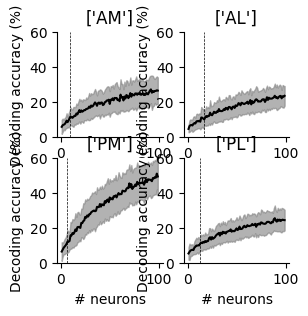

In [90]:
# iterate through each bin
all_sign = np.array(all_sign)
fig, axs = plt.subplots(2,2, figsize=(3,3))
chance_accuracy = (1/11)*100

label_groups = ['AM','PM','AL','PL']
# first plot the cumulative accuracy
n_neurons = 100

for bin in range(all_predicted.shape[0]):
    
    if bin ==0:        
        ax = axs[0,0]
        
    elif bin ==1:
        ax = axs[1,0]
    elif bin ==2:
        ax = axs[0,1]
    elif bin ==3:
        ax = axs[1,1]
    these_scores = all_scores[bin,:,:n_neurons]
    # Compute mean and standard deviation of accuracies
    mean_accuracies = np.nanmean(these_scores, axis=0)
    std_accuracies = np.nanstd(these_scores, axis=0)

    # Define the number of neurons
    neurons = np.arange(1, n_neurons+1)

    # Remove NaNs from mean_accuracies and corresponding neurons
    valid_indices = ~np.isnan(mean_accuracies)
    valid_neurons = neurons[valid_indices]
    valid_mean_accuracies = mean_accuracies[valid_indices]
    valid_std_accuracies = std_accuracies[valid_indices]

    # Interpolate to create a smooth line
    interp_func = interp1d(valid_neurons, valid_mean_accuracies, kind='linear')
    y_interp = interp_func(neurons[:-1])
    ax.plot(neurons[:-1],y_interp,'k')

    interp_func = interp1d(valid_neurons, valid_std_accuracies, kind='linear')
    std_interp = interp_func(neurons[:-1])
    ax.fill_between(neurons[:-1],y_interp-std_interp ,y_interp+std_interp,color = 'gray', alpha=0.6)
    ax.set_ylim([0,60])
    ax.set_yticks([0,20,40,60])
    
    ax.axvline(x=all_sign[bin], color='k', linestyle='--',linewidth=0.5)
    ax.set_ylabel('Decoding accuracy (%)',fontsize = 10)
    ax.set_xlabel('# neurons',fontsize = 10)
    
    ax.set_title([label_groups[bin]])
        
sns.despine(top=True, right=True, left=False, bottom=False)

# define a saving directory and save it 
dir = ''.join([saving_path,'Accuracy_bins.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)


In [19]:
saving_path = 'C:\\Users\\bianchg\\Documents\\GitHub\\Bianchini2025_SC\\Figures_output\\'

Text(0, 0.5, 'accuracy')

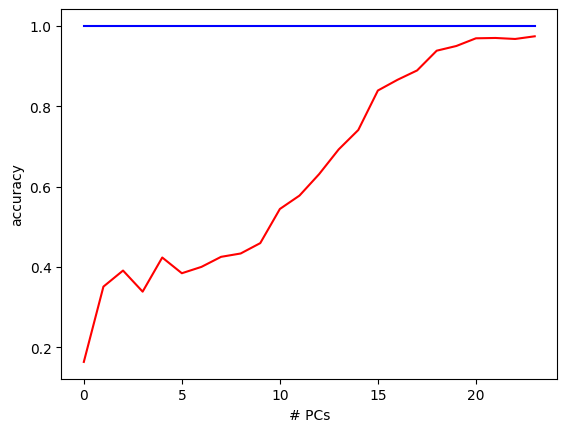

In [53]:
# plot control decoder output
    
all_best_C = np.load(f'Z:\\home\\shared\\Gaia\\Coliseum\\Delays\\python_codes\\CLF_cluster\\decoder_analysis_paper\\clf_control\\all_best_C_delayN.npy') # the C
all_train_accuracy = np.load(f'Z:\\home\\shared\\Gaia\\Coliseum\\Delays\\python_codes\\CLF_cluster\\decoder_analysis_paper\\clf_control\\all_train_accuracy_delayN.npy')# the train accuracy
all_test_accuracy = np.load(f'Z:\\home\\shared\\Gaia\\Coliseum\\Delays\\python_codes\\CLF_cluster\\decoder_analysis_paper\\clf_control\\all_test_accuracy_delayN.npy')# the test accuracy

plt.plot(all_train_accuracy,c='b')
plt.plot(all_test_accuracy,c='r')

plt.xlabel('# PCs')
plt.ylabel('accuracy')

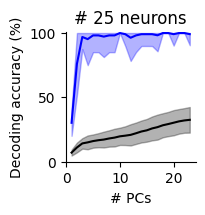

In [27]:
fig, ax = plt.subplots(1,1, figsize=(1.3,1.3))
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.subplots_adjust(hspace=0.5)
this_n = 25
n_rep = 100
n_dim = 24
train_accuracy = np.zeros((n_dim,n_rep))
test_accuracy = np.zeros((n_dim,n_rep))
for r in range(n_rep):

    all_best_C = np.load(f'Z:\\home\\shared\\Gaia\\Coliseum\\Delays\\python_codes\\CLF_cluster\\decoder_analysis_paper\\clf_control\\all_best_C_delay{this_n}N_rep{r}.npy') # the C
    all_train_accuracy = np.load(f'Z:\\home\\shared\\Gaia\\Coliseum\\Delays\\python_codes\\CLF_cluster\\decoder_analysis_paper\\clf_control\\all_train_accuracy_delay{this_n}N_rep{r}.npy')# the train accuracy
    all_test_accuracy = np.load(f'Z:\\home\\shared\\Gaia\\Coliseum\\Delays\\python_codes\\CLF_cluster\\decoder_analysis_paper\\clf_control\\all_test_accuracy_delay{this_n}N_rep{r}.npy')# the test accuracy
    
    train_accuracy[:,r] = all_train_accuracy*100
    test_accuracy[:,r] = all_test_accuracy*100
    
# Compute mean and standard deviation of accuracies
mean_train_accuracy = np.nanmean(train_accuracy, axis=1)
std_train_accuracy = np.nanstd(train_accuracy, axis=1)

mean_test_accuracy = np.nanmean(test_accuracy, axis=1)
std_test_accuracy = np.nanstd(test_accuracy, axis=1)

# Define the number of neurons
neurons = np.arange(1, n_dim + 1)

# Interpolate for smooth lines and clipped standard deviation
interp_train_mean = interp1d(neurons, mean_train_accuracy, kind='linear')
train_mean_interp = interp_train_mean(neurons[:-1])
interp_train_std = interp1d(neurons, std_train_accuracy, kind='linear')
train_std_interp = interp_train_std(neurons[:-1])
ax.plot(neurons[:-1], train_mean_interp, 'b', label='Train Accuracy')
ax.fill_between(neurons[:-1], train_mean_interp - train_std_interp, np.minimum(100, train_mean_interp + train_std_interp), color='b', alpha=0.3)

interp_test_mean = interp1d(neurons, mean_test_accuracy, kind='linear')
test_mean_interp = interp_test_mean(neurons[:-1])
interp_test_std = interp1d(neurons, std_test_accuracy, kind='linear')
test_std_interp = interp_test_std(neurons[:-1])
ax.plot(neurons[:-1], test_mean_interp, 'k', label='Test Accuracy')
ax.fill_between(neurons[:-1], test_mean_interp - test_std_interp, np.minimum(100, test_mean_interp + test_std_interp), color='k', alpha=0.3)

plt.xlabel('# PCs')
plt.ylabel('Decoding accuracy (%)')
ax.set_ylim(0, 101)  # Ensure y-axis limits are appropriate for accuracy
sns.despine(top=True, right=True, left=False, bottom=False)
plt.title('# 25 neurons')

# define a saving directory and save it 
dir = ''.join([saving_path,'25N_control_dec.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)

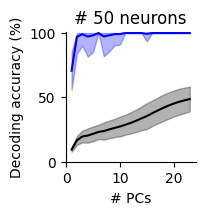

In [28]:
fig, ax = plt.subplots(1,1, figsize=(1.3,1.3))
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.subplots_adjust(hspace=0.5)
this_n = 50
n_rep = 100
n_dim = 24
train_accuracy = np.zeros((n_dim,n_rep))
test_accuracy = np.zeros((n_dim,n_rep))
for r in range(n_rep):

    all_best_C = np.load(f'Z:\\home\\shared\\Gaia\\Coliseum\\Delays\\python_codes\\CLF_cluster\\decoder_analysis_paper\\clf_control\\all_best_C_delay{this_n}N_rep{r}.npy') # the C
    all_train_accuracy = np.load(f'Z:\\home\\shared\\Gaia\\Coliseum\\Delays\\python_codes\\CLF_cluster\\decoder_analysis_paper\\clf_control\\all_train_accuracy_delay{this_n}N_rep{r}.npy')# the train accuracy
    all_test_accuracy = np.load(f'Z:\\home\\shared\\Gaia\\Coliseum\\Delays\\python_codes\\CLF_cluster\\decoder_analysis_paper\\clf_control\\all_test_accuracy_delay{this_n}N_rep{r}.npy')# the test accuracy
    
    train_accuracy[:,r] = all_train_accuracy*100
    test_accuracy[:,r] = all_test_accuracy*100
    
# Compute mean and standard deviation of accuracies
mean_train_accuracy = np.nanmean(train_accuracy, axis=1)
std_train_accuracy = np.nanstd(train_accuracy, axis=1)

mean_test_accuracy = np.nanmean(test_accuracy, axis=1)
std_test_accuracy = np.nanstd(test_accuracy, axis=1)

# Define the number of neurons
neurons = np.arange(1, n_dim + 1)

# Interpolate for smooth lines and clipped standard deviation
interp_train_mean = interp1d(neurons, mean_train_accuracy, kind='linear')
train_mean_interp = interp_train_mean(neurons[:-1])
interp_train_std = interp1d(neurons, std_train_accuracy, kind='linear')
train_std_interp = interp_train_std(neurons[:-1])
ax.plot(neurons[:-1], train_mean_interp, 'b', label='Train Accuracy')
ax.fill_between(neurons[:-1], train_mean_interp - train_std_interp, np.minimum(100, train_mean_interp + train_std_interp), color='b', alpha=0.3)

interp_test_mean = interp1d(neurons, mean_test_accuracy, kind='linear')
test_mean_interp = interp_test_mean(neurons[:-1])
interp_test_std = interp1d(neurons, std_test_accuracy, kind='linear')
test_std_interp = interp_test_std(neurons[:-1])
ax.plot(neurons[:-1], test_mean_interp, 'k', label='Test Accuracy')
ax.fill_between(neurons[:-1], test_mean_interp - test_std_interp, np.minimum(100, test_mean_interp + test_std_interp), color='k', alpha=0.3)

plt.xlabel('# PCs')
plt.ylabel('Decoding accuracy (%)')
ax.set_ylim(0, 101)  # Ensure y-axis limits are appropriate for accuracy
sns.despine(top=True, right=True, left=False, bottom=False)
plt.title('# 50 neurons')
# define a saving directory and save it 
dir = ''.join([saving_path,'50_control_dec.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)

In [102]:
mean_accuracies = np.nanmean(train_accuracy, axis=1)
std_accuracies = np.nanstd(train_accuracy, axis=1)

In [105]:
train_accuracy[3,:], mean_accuracies[3], std_accuracies[3]

(array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.22791667, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ]),
 0.9613958333333332,
 0.16827166129960142)

In [96]:
std_accuracies

array([1.78626940e-01, 1.38706199e-02, 6.25000000e-05, 0.00000000e+00,
       0.00000000e+00, 2.72845915e-01, 0.00000000e+00, 1.85707257e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [94]:
all_best_C

array([[  1],
       [  1],
       [  1],
       [100],
       [ 10],
       [  1],
       [  1],
       [  1],
       [  1],
       [  1],
       [  1],
       [  1],
       [  1],
       [  1],
       [  1],
       [  1],
       [ 10],
       [ 10],
       [ 10],
       [ 10],
       [ 10],
       [ 10],
       [ 10],
       [ 10]], dtype=int64)

In [87]:
#%% Store classifier accuracy for spatial bins in 2D
# load the outputs from this code run_classifier_2D_3D.py

n_neurons = 50
n_var = 2 #dimensions

# load predicted and test
file = ''.join([data_path,f'decoder_datasets\\clf_2D_and_3D\\PRED_n{n_neurons}_{n_var}_SVM.npy'])
all_predicted = np.load(file)
file = ''.join([data_path,f'decoder_datasets\\clf_2D_and_3D\\TEST_n{n_neurons}_{n_var}_SVM.npy'])
Y_test=np.load(file)

# populate the scores of each bin
all_scores_bins=np.zeros((all_predicted.shape[0],all_predicted.shape[1]))

for bin in range(all_predicted.shape[0]): # for each bin
    for rep in range(all_predicted.shape[1]): # for each repetition
        delay_score = np.zeros((all_predicted.shape[2],1))
        for k in range(all_predicted.shape[2]): # for each k fold
            pred = np.reshape(all_predicted[bin,rep,k,:],-1)
            test = np.reshape(Y_test[bin,rep,k,:],-1)

            cm = confusion_matrix(test, pred,normalize='true')
            score = np.diag(cm)
            delay_score[k] = np.mean(score[:11])

            if delay_score[k] ==1:
                delay_score[k] = 0

        all_scores_bins[bin,rep] = np.mean(delay_score)*100

save_dir = ''.join([data_path,f'decoder_datasets\\decoder_accuracy_2D.npy'])
np.save(save_dir,all_scores_bins) 


In [88]:
#%% Store classifier accuracy for spatial bins in 3D
# load the outputs from this code run_classifier_2D_3D.py

n_neurons = 50
n_var = 3

# load predicted and test
file = ''.join([data_path,f'decoder_datasets\\clf_2D_and_3D\\PRED_n{n_neurons}_{n_var}_SVM.npy'])
all_predicted = np.load(file)
file = ''.join([data_path,f'decoder_datasets\\clf_2D_and_3D\\TEST_n{n_neurons}_{n_var}_SVM.npy'])
Y_test=np.load(file)

# populate the scores of each bin
all_scores_bins=np.zeros((all_predicted.shape[0],all_predicted.shape[1]))

for bin in range(all_predicted.shape[0]): # for each bin
    for rep in range(all_predicted.shape[1]): # for each repetition
        delay_score = np.zeros((all_predicted.shape[2],1))
        for k in range(all_predicted.shape[2]): # for each k fold
            pred = np.reshape(all_predicted[bin,rep,k,:],-1)
            test = np.reshape(Y_test[bin,rep,k,:],-1)

            cm = confusion_matrix(test, pred,normalize='true')
            score = np.diag(cm)
            delay_score[k] = np.mean(score[:11])

            if delay_score[k] ==1:
                delay_score[k] = 0

        all_scores_bins[bin,rep] = np.mean(delay_score)*100

scores = np.mean(all_scores_bins,axis=1)
save_dir = ''.join([data_path,f'decoder_datasets\\decoder_accuracy_3D.npy'])
np.save(save_dir,scores) 


In [91]:
# extract decoding accuracy along ML and AP axes for visual, auditory, multisensoryND and delay neurons 
# load the outputs from this code run_classifier_1D_modalities.py

axes = ['ML','AP']
classes = ['visual','auditory','multi no delay','delay']
which_mod = [1,2,3,4]

n = 25 # choose number of neurons
r = 650 # bin size chosen
count = 0

for type_axis in axes:
    
    for l,mod in enumerate(which_mod):    

        # load the predicted and the test
        file = ''.join([data_path,f'decoder_datasets\\clf_1D\\{type_axis}_clf_PRED_n{n}_step{r}_mod{mod}.0_SVM.npy'])
        all_predicted = np.load(file)
        file = ''.join([data_path,f'decoder_datasets\\clf_1D\\{type_axis}_clf_TEST_n{n}_step{r}_mod{mod}.0_SVM.npy'])
        Y_test=np.load(file)

        # load bin specs
        file = ''.join([data_path,f'decoder_datasets\\clf_1D\\{type_axis}_clf_IDS_n{n}_step{r}_mod{mod}.0_SVM.npy']) # the ids of the neurons
        specs_neurons = np.load(file)
        file = ''.join([data_path,f'decoder_datasets\\clf_1D\\{type_axis}_clf_BINS_n{n}_step{r}_mod{mod}.0_SVM.npy']) # the ids of the neurons # the number of session and animals in the bin 
        specs_bins = np.load(file)
        loc = specs_bins[:,0]

        for i in range(1,len(loc)):
            loc[i]= loc[i-1]+loc[i]
        locs = np.zeros((2,len(loc)))
        for i in range(len(loc)):
            if i==0:
                locs[:,i] = [0,loc[i]]
            else:
                locs[:,i] = [loc[i-1],loc[i]]

        scores = np.zeros((all_predicted.shape[1],all_predicted.shape[0]))

        for n_bin in range(all_predicted.shape[0]): # for each bin
            pred = all_predicted[n_bin,:,:,:]
            test = Y_test[n_bin,:,:,:]

            for rep in range(all_predicted.shape[1]): #for each repetition
                delay_score = np.zeros((all_predicted.shape[2],1))
                for k in range(all_predicted.shape[2]): # for each k fold

                    cm = confusion_matrix(test[rep,k,:], pred[rep,k,:],normalize='true')
                    score = np.diag(cm)
                    delay_score[k] = np.mean(score[:11])
                    if delay_score[k] ==1:
                        delay_score[k] = float("nan")
                scores[rep,n_bin] = np.mean(delay_score)*100

        save_dir = ''.join([data_path,f'decoder_datasets\\decoder_accuracy_{type_axis}_mod{mod}.npy'])
        np.save(save_dir,scores) 

        save_dir = ''.join([data_path,f'decoder_datasets\\decoder_accuracy_{type_axis}_locations_mod{mod}.npy'])
        np.save(save_dir,locs) 
